# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results,mouse_metadata,on = 'Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.

# This is the same whether I use .unique() or not, meaning there are no duplicate mice
len(mouse_metadata['Mouse ID'])
# len(mouse_metadata['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
counts_data = merged_data.groupby(['Mouse ID','Timepoint']).count()
duplicate_data = counts_data[counts_data['Tumor Volume (mm3)']>1]
duplicate_data = duplicate_data.reset_index()
duplicate_data['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data[merged_data['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop(merged_data[merged_data['Mouse ID'] == 'g989'].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

# 248 because we removed all records for the duplcate mouse

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_groupby = clean_data.groupby('Drug Regimen')
means = regimen_groupby['Tumor Volume (mm3)'].mean()
medians = regimen_groupby['Tumor Volume (mm3)'].median()
variances = regimen_groupby['Tumor Volume (mm3)'].var()
st_devs = regimen_groupby['Tumor Volume (mm3)'].std()
sems = regimen_groupby['Tumor Volume (mm3)'].sem()
regimen_summary = pd.DataFrame({'Mean Tumor Volume':means,
                                'Median Tumor Volume':medians,
                                'Variance in Tumor Volume':variances,
                                'Standard Deviations in Tumor Volume':st_devs,
                                'SEM':sems})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviations in Tumor Volume,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_2 = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

regimen_summary_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Observations for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Observations'>

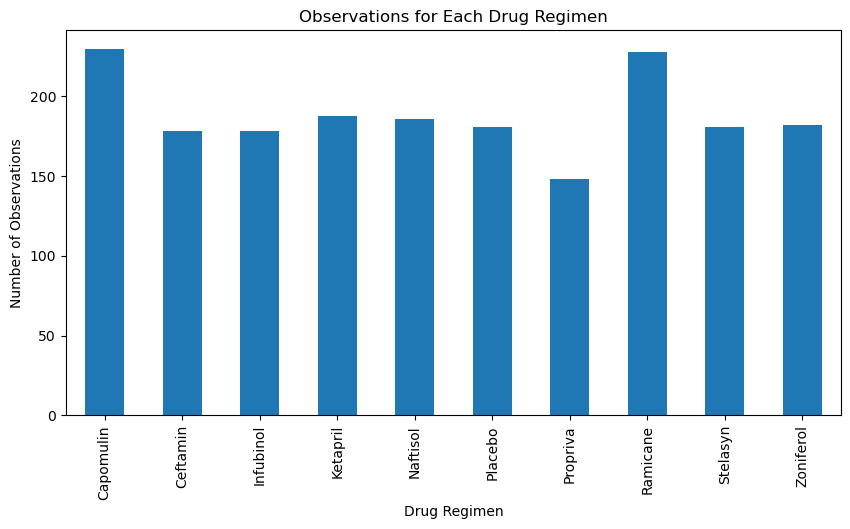

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_groupby.count()['Mouse ID'].plot(kind='bar',figsize=(10,5),title='Observations for Each Drug Regimen',ylabel='Number of Observations',width=0.5)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

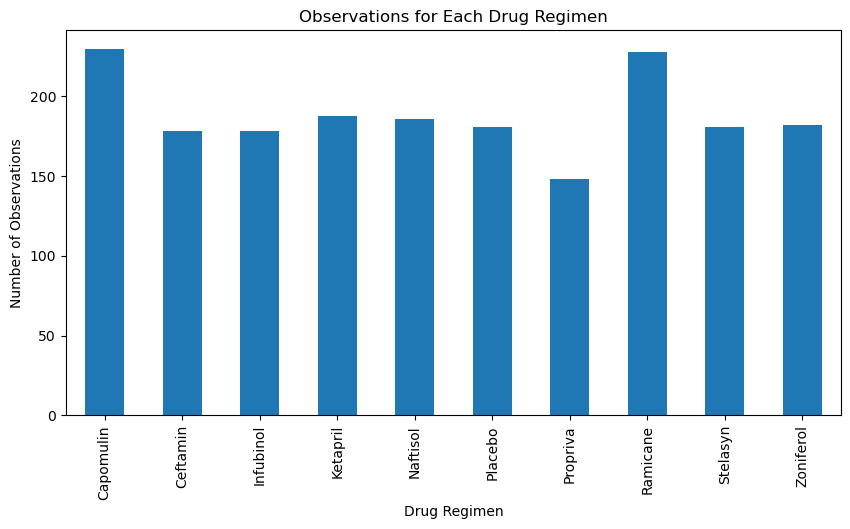

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10,5))
plt.bar(regimen_groupby.count().reset_index()['Drug Regimen'],regimen_groupby.count().reset_index()['Mouse ID'],width=0.5)
plt.title('Observations for Each Drug Regimen')
plt.ylabel('Number of Observations')
plt.xlabel('Drug Regimen')
plt.xlim([-.5,9.5])
plt.xticks(rotation=90)

<Axes: title={'center': 'Distribution of Mice by Sex'}>

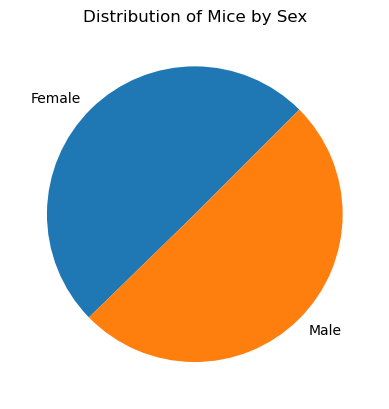

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_metadata.groupby('Sex').count()['Mouse ID'].plot(kind='pie',ylabel='',title='Distribution of Mice by Sex',startangle=45)

Text(0.5, 1.0, 'Distribution of Mice by Sex')

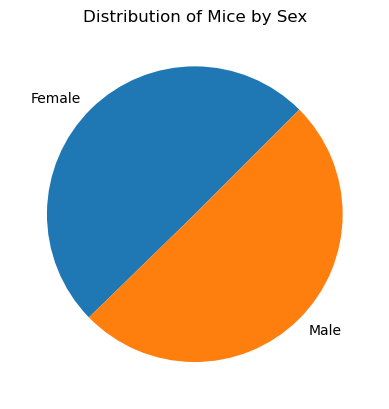

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_group = mouse_metadata.groupby('Sex')
pie_vals = pie_group.count()['Mouse ID']
pie_xvals = pie_vals.reset_index()['Sex']

plt.pie(pie_vals,labels=pie_xvals,startangle=45)
plt.title('Distribution of Mice by Sex')

## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max()).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data_w_max_tumors = pd.merge(clean_data,max_timepoints,on = ['Mouse ID','Timepoint'])
drug_subset = (data_w_max_tumors['Drug Regimen']=='Capomulin') | (data_w_max_tumors['Drug Regimen']=='Ramicane') | (data_w_max_tumors['Drug Regimen']=='Infubinol') | (data_w_max_tumors['Drug Regimen']=='Ceftamin')
data_drug_subset = data_w_max_tumors[drug_subset]

In [ ]:
# treatments = data_drug_subset['Drug Regimen'].unique()
# fig1, ax1 = plt.subplots()
# # ax1.boxplot(data_drug_subset['Tumor Volume (mm3)'][data_drug_subset['Drug Regimen']=='Capomulin'])
# ax1.boxplot(data_drug_subset['Tumor Volume (mm3)'],labels=treatments)
# plt.show()

In [108]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = data_drug_subset['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
tumor_vol_dataframe = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    loop_data = data_drug_subset[data_drug_subset['Drug Regimen']==drug].reset_index()

    # add subset
    tumor_vol_data.append(loop_data['Tumor Volume (mm3)'])
    tumor_vol_dataframe[drug]=loop_data['Tumor Volume (mm3)']
    
    # Determine outliers using upper and lower bounds
    quartiles = loop_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    potential_outliers = loop_data.loc[(loop_data['Tumor Volume (mm3)']<lower_bound) | (loop_data['Tumor Volume (mm3)']>upper_bound)]

    print(f'For the drug {drug}, the median final tumor volume is {round(quartiles[0.5],2)}. The first quartile is {round(lowerq,2)} and the third quartile is {round(upperq,2)}.')
    print(f'This means that the interquartile range (IQR) is {round(iqr,2)} and any values less than {round(lower_bound,2)} (the first quartile minus 1.5*IQR) or greater than {round(upper_bound,2)} (the third quartile plus 1.5*IQR) are potential outliers.')
    print(f'The following Mouse IDs and Tumor Volumes are potential outliers in the {drug} treatment group:')
    if potential_outliers.size > 0:
        print(potential_outliers[['Mouse ID','Tumor Volume (mm3)']].set_index('Mouse ID'))
    else:
        print('According to our 1.5*IQR method, there are no potential outliers.')
    print('-----------------------------------------------------------------------------------')

25
For the drug Capomulin, the median final tumor volume is 38.13. The first quartile is 32.38 and the third quartile is 40.16.
This means that the interquartile range (IQR) is 7.78 and any values less than 20.7 (the first quartile minus 1.5*IQR) or greater than 51.83 (the third quartile plus 1.5*IQR) are potential outliers.
The following Mouse IDs and Tumor Volumes are potential outliers in the Capomulin treatment group:
According to our 1.5*IQR method, there are no potential outliers.
-----------------------------------------------------------------------------------
25
For the drug Infubinol, the median final tumor volume is 60.17. The first quartile is 54.05 and the third quartile is 65.53.
This means that the interquartile range (IQR) is 11.48 and any values less than 36.83 (the first quartile minus 1.5*IQR) or greater than 82.74 (the third quartile plus 1.5*IQR) are potential outliers.
The following Mouse IDs and Tumor Volumes are potential outliers in the Infubinol treatment gro

<Axes: title={'center': 'Final Tumor Volumes by Drug Treatment'}, xlabel='Drug Treatment', ylabel='Tumor Volume (mm3)'>

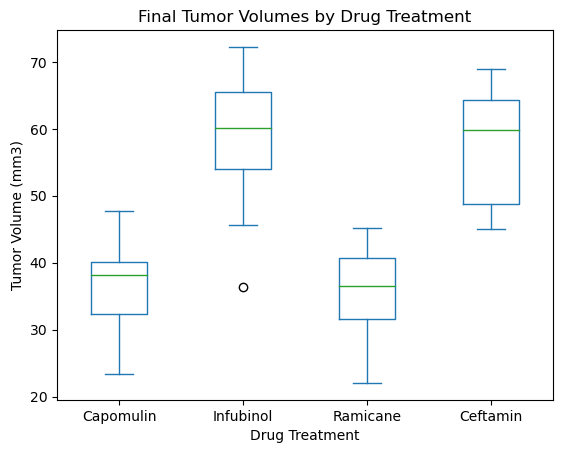

In [105]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_dataframe.plot(kind='box',title='Final Tumor Volumes by Drug Treatment',ylabel='Tumor Volume (mm3)',xlabel='Drug Treatment')

## Line and Scatter Plots

<Axes: title={'center': 'Tumor Volume over Time for Mouse b128'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

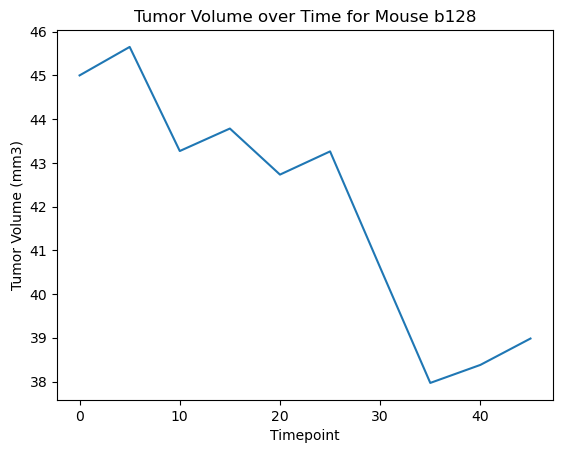

In [113]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Find a suitable Mouse ID using this: (I chose b128)
# clean_data[clean_data['Drug Regimen']=='Capomulin']

capomulin_mouse_data = clean_data[clean_data['Mouse ID']=='b128']
capomulin_mouse_data.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',ylabel='Tumor Volume (mm3)',title='Tumor Volume over Time for Mouse b128',legend=None)

Text(0.5, 1.0, 'Average Observed Tumor Volume vs Mouse Weight for the Capomulin Regimen')

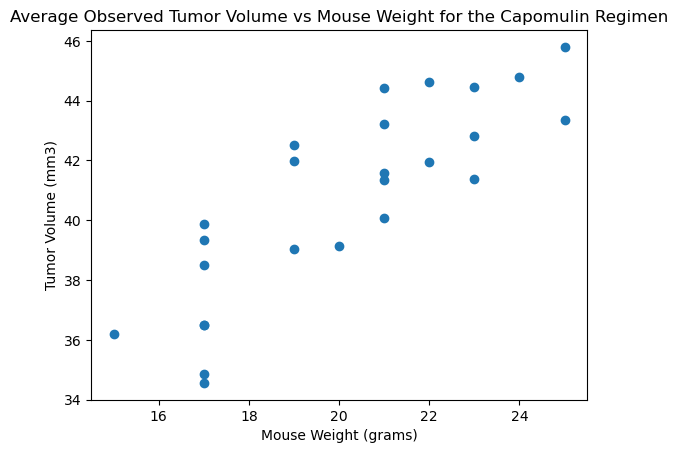

In [120]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen_data = clean_data[clean_data['Drug Regimen']=='Capomulin']
capomulin_groupby = capomulin_regimen_data.groupby('Mouse ID')
capomulin_regimen_averages = capomulin_groupby['Tumor Volume (mm3)'].mean()
capomulin_regimen_weights = capomulin_groupby['Weight (g)'].first()
plt.scatter(x=capomulin_regimen_weights,y=capomulin_regimen_averages)
plt.xlabel('Mouse Weight (grams)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Observed Tumor Volume vs Mouse Weight for the Capomulin Regimen')

## Correlation and Regression

The correlation between the average tumor volume and mouse weight for the Capomulin regimen is 0.84.


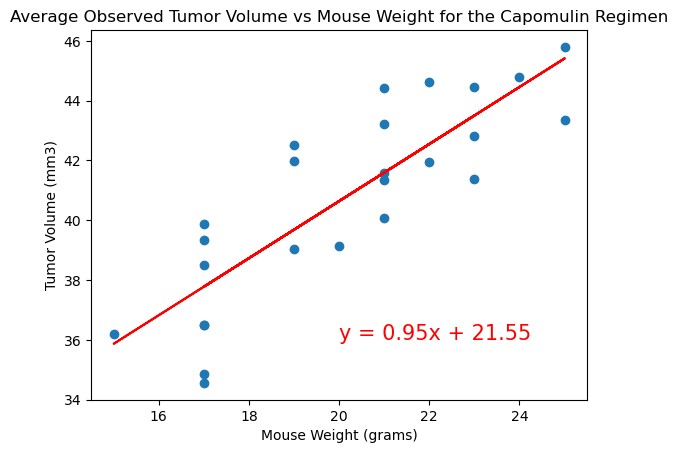

In [127]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_regimen_averages,capomulin_regimen_weights)
print(f'The correlation between the average tumor volume and mouse weight for the Capomulin regimen is {round(correlation[0],2)}.')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_regimen_weights, capomulin_regimen_averages)
regress_values = capomulin_regimen_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x=capomulin_regimen_weights,y=capomulin_regimen_averages)
plt.plot(capomulin_regimen_weights,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight (grams)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Observed Tumor Volume vs Mouse Weight for the Capomulin Regimen')
plt.show()